# Simple Amino acid eval 

imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


grab experimental data and numerical data

In [2]:
df_num_data = pd.read_csv("simple_amino.csv")
df_exp_data = pd.read_csv("single_mut_effects.csv")

quick look at the data frames

In [3]:
df_exp_data.describe()

,site_RBD,site_SARS2,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
count,4221.000000,4221.000000,3994.000000,3991.000000,4003.000000,4183.000000,4184.000000,4198.000000
mean,101.000000,431.000000,-0.920441,-0.968637,-0.943600,-1.203875,-1.166883,-1.184726
std,58.029858,58.029858,1.389299,1.412122,1.391609,1.273002,1.233323,1.243281
min,1.000000,331.000000,-4.760000,-4.840000,-4.840000,-4.710000,-4.650000,-4.650000
25%,51.000000,381.000000,-1.080000,-1.230000,-1.140000,-2.200000,-2.120000,-2.150000
50%,101.000000,431.000000,-0.255000,-0.300000,-0.280000,-0.740000,-0.730000,-0.740000
75%,151.000000,481.000000,-0.040000,-0.050000,-0.050000,-0.125000,-0.140000,-0.140000
max,201.000000,531.000000,0.360000,0.380000,0.300000,0.920000,1.000000,0.990000


simple amino acids are those starting with single letter codes defined below:

D_amino = ["V", "I", "L", "M" , "F", "Y", "W"]

In [4]:
df_num_data.describe()

,Unnamed: 0,delta_delta_g_gen,delta_delta_g_gen_error,delta_delta_g_gen_66,delta_delta_g_gen_66_error
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,31.000000,-0.711097,0.139516,-0.539654,0.579494
std,18.330303,2.134639,0.329657,1.838006,0.897401
min,0.000000,-10.879800,0.000100,-8.891100,0.071700
25%,15.500000,-0.039700,0.000650,-0.037300,0.095750
50%,31.000000,-0.000800,0.004400,0.001300,0.135700
75%,46.500000,0.003450,0.050100,0.007350,0.469350
max,62.000000,0.059100,1.504500,0.356100,3.265400


notes on the numerical data:

$\Delta \Delta G$ calc is defined as wildtype - mutation. 

e.g. see F515A:
DELTA TOTAL_wild = -69.7344 
DELTA TOTAL_mut  = -69.7336
DELTA DELTA G binding = -0.0008

In [5]:
DELTA_TOTAL_wild = -69.7344 
DELTA_TOTAL_mut  = -69.7336
DELTA_TOTAL_wild- DELTA_TOTAL_mut

-0.0007999999999981355

get the indices for our mutants 

In [6]:
num_muts = df_num_data["mutations"]
exp_muts_np = df_exp_data["mutation"].to_numpy()
idx= []  
for mut in num_muts : 
    idx.append(np.where(exp_muts_np == mut )[0][0] ) 

check the mutations: 

uncomment below to double check

In [7]:
exp_muts_np[idx] == num_muts.to_numpy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## Data evalutation: 

finding delta_G_deg from paper: 

In [8]:
R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
T =298  #room temp  
K_D_app = 3.9*1e-11 #from paper 

#note we should get -R*T* (-np.log(K_D_app)) as we have a K_D and not a K_a
#the double neg is removed here. 
delta_g_deg = R * T * np.log(K_D_app)
delta_g_deg

-14.141759785560145

checking muts

In [9]:
site_SARS2_val = df_exp_data.iloc[idx]
site_SARS2_val["mutation"].to_numpy()

array(['Y508A', 'V341A', 'F486A', 'L387A', 'F374A', 'Y423A', 'F456A',
       'Y495A', 'V503A', 'L335A', 'V401A', 'Y451A', 'V395A', 'I402A',
       'Y489A', 'Y396A', 'Y449A', 'L461A', 'L518A', 'V350A', 'L455A',
       'F497A', 'F429A', 'Y505A', 'V512A', 'V483A', 'L441A', 'Y351A',
       'I434A', 'L390A', 'W436A', 'F392A', 'W353A', 'V433A', 'V367A',
       'L425A', 'F338A', 'F342A', 'V382A', 'V510A', 'V445A', 'Y473A',
       'F377A', 'L368A', 'L513A', 'V511A', 'Y380A', 'Y369A', 'F347A',
       'F515A', 'I410A', 'I472A', 'V524A', 'Y421A', 'L517A', 'V407A',
       'V362A', 'Y453A', 'Y365A', 'L492A', 'F490A', 'L452A', 'I418A'],
      dtype=object)

try using bind_avg column in the exp data frame 

In [10]:
site_SARS2_val = df_exp_data.iloc[idx]["bind_avg"].to_numpy()

### first method:


$$\Delta log_{10}(K_{D,app}) = log_{10}(K_{mutation}) - log_{10}(K_{D,app}) $$
$$given \_ value := \Delta log_{10}(K_{D,app})$$
$$10^{given\_ value} = K_{mutation}/K_{D,app}$$
$$ K_{mutation} =10^{given \_ value} * K_{D,app} $$

note: this is with the idea of mut - wildtype, which is not present in our numerical data, to make this convertion it just becomes 
$$\Delta log_{10}(K_{D,app}) = log_{10}(K_{D,app}) - log_{10}(K_{mutation})$$
$$ K_{mutation} =10^{- given \_ value} * K_{D,app} $$

but converting out numerical result to mut - wildtype is easier
$$\Delta \Delta G_{w-m} = - \Delta \Delta G_{m-w} $$
so we will do that 

In [11]:
#using GB66
num_66 = - df_num_data["delta_delta_g_gen_66"].to_numpy()

In [12]:
tmp_K_mut = 10**(site_SARS2_val) * K_D_app
#- sign due to K_d and not K_a 
delta_g_first_method = -R * T * np.log(tmp_K_mut)
delta_g_first_method 

array([14.68520671, 15.31017067, 14.60368967, 14.83465461, 14.5357588 ,
       20.66312287, 17.08995934, 17.33451046, 14.22327682, 14.08741509,
       15.03844721, 15.28299832, 14.35913855, 15.4460324 , 17.48395836,
       14.65803436, 15.90796229, 15.50037709, 14.08741509, 14.68520671,
       14.78030992, 20.66312287, 19.34526408, 17.44319984, 15.11996425,
       14.1825183 , 14.29120769, 15.32375684, 14.54934498, 14.20969065,
       15.16072277, 14.16893213, 15.96230698, 16.28837513, 13.99231188,
       18.2719564 , 15.45961857, 15.48679092, 14.49500029, 15.26941215,
       14.19610448, 17.10354552, 14.943344  , 15.26941215, 18.40781813,
       15.20148129, 16.72313267, 14.15534596, 15.32375684, 15.02486104,
       20.41857175, 15.07920573, 14.236863  , 15.06561956, 14.25044917,
       15.31017067, 14.26403534, 14.50858646, 14.5357588 , 19.65774606,
       14.10100127, 14.07382892, 16.12534106])

### $\Delta \Delta G$ calc

$$\Delta \Delta G =\Delta G \degree +R T ln(K_{mutation})$$

In [13]:
del_del_g_total =   delta_g_deg + delta_g_first_method  #i think signs are right here: 
del_del_g_total

array([ 0.54344692,  1.16841089,  0.46192988,  0.69289483,  0.39399902,
        6.52136308,  2.94819956,  3.19275067,  0.08151704, -0.05434469,
        0.89668742,  1.14123854,  0.21737877,  1.30427262,  3.34219858,
        0.51627458,  1.7662025 ,  1.35861731, -0.05434469,  0.54344692,
        0.63855013,  6.52136308,  5.20350429,  3.30144006,  0.97820446,
        0.04075852,  0.1494479 ,  1.18199706,  0.40758519,  0.06793087,
        1.01896298,  0.02717235,  1.82054719,  2.14661535, -0.1494479 ,
        4.13019662,  1.31785879,  1.34503114,  0.3532405 ,  1.12765237,
        0.05434469,  2.96178573,  0.80158421,  1.12765237,  4.26605835,
        1.0597215 ,  2.58137289,  0.01358617,  1.18199706,  0.88310125,
        6.27681196,  0.93744594,  0.09510321,  0.92385977,  0.10868938,
        1.16841089,  0.12227556,  0.36682667,  0.39399902,  5.51598627,
       -0.04075852, -0.06793087,  1.98358127])

plot w/ respect to binding site

In [14]:
mut_arg =np.array([mut[1:-1] for mut in df_num_data["mutations"].to_numpy()])
mut_arg_idx = mut_arg.argsort()
mut_arg_sorted = mut_arg[mut_arg_idx]

In [15]:
# num_66 = - df_num_data["delta_delta_g_gen_66"].to_numpy()
# del_del_g_total =   delta_g_deg + delta_g_first_method
# site_SARS2_val = df_exp_data.iloc[idx]["bind_avg"].to_numpy()

In [16]:
mut_arg_idx

array([ 9, 36,  1, 37, 48, 19, 27, 32, 56, 58, 34, 43, 47,  4, 42, 46, 38,
        3, 29, 31, 12, 15, 10, 13, 55, 50, 62, 53,  5, 35, 22, 33, 28, 30,
       26, 40, 16, 11, 61, 57, 20,  6, 17, 51, 41, 25,  2, 14, 60, 59,  7,
       21,  8, 23,  0, 39, 45, 24, 44, 49, 54, 18, 52], dtype=int64)

again check index

In [17]:
df_exp_data.iloc[idx]["mutation"].to_numpy()[mut_arg_idx] == df_num_data["mutations"].to_numpy()[mut_arg_idx]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Text(0.5, 0, 'site')

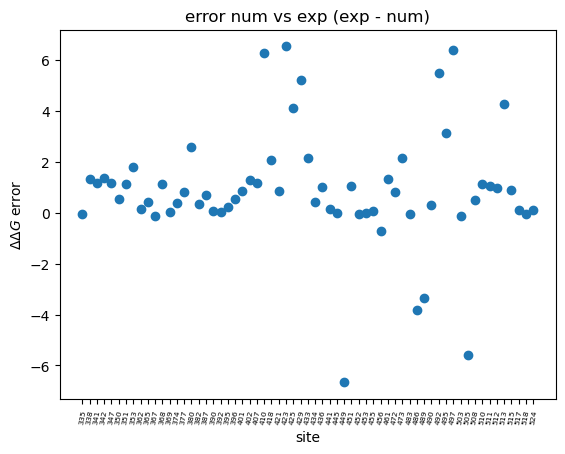

In [18]:
error_first_method = del_del_g_total[mut_arg_idx] - num_66[mut_arg_idx]
plt.scatter(mut_arg_sorted, error_first_method)
plt.tick_params(axis="x", labelsize=5.5, rotation=80)
plt.title("error num vs exp (exp - num)")
plt.ylabel("$\Delta \Delta G$ error")
plt.xlabel("site")

In [19]:
rmse_1 = np.sqrt( np.mean( error_first_method**2 ) )
rmse_1

2.442922791299671

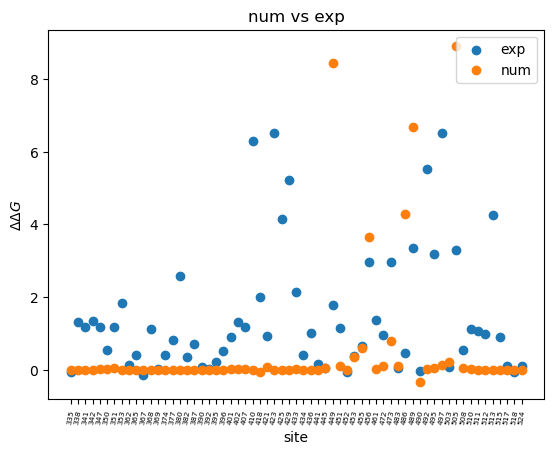

In [20]:
plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
plt.scatter(mut_arg_sorted, num_66[mut_arg_idx], label="num")
plt.tick_params(axis="x", labelsize=5.5, rotation=80)
plt.title("num vs exp")
plt.ylabel("$\Delta \Delta G$")
plt.xlabel("site")
plt.legend()

function for this:


In [21]:
def delta_delta_G_exp_cal_frist_method(site_SARS2_val ) :
    R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
    T =298  #room temp  
    K_D_app = 3.9*1e-11 #from paper
    
    delta_g_deg = R * T * np.log(K_D_app)
    
    tmp_K_mut = 10**(site_SARS2_val) * K_D_app
    delta_g_first_method = -R * T * np.log(tmp_K_mut)
    del_del_g_total =   delta_g_deg + delta_g_first_method
    return del_del_g_total

get indexes based on mutation and site


In [22]:
simple_amino = ["V", "I", "L", "M", "F", "Y", "W"]
sorted_dict = {} 
for letter_key in simple_amino :
    #get index mutations starting with letter_key 
    dftemp = df_num_data[ \
        df_num_data["mutations"].str.startswith(letter_key) ].iloc[:,0]
    
    #get mutations from the index
    mut_names = exp_muts_np[idx][dftemp.to_numpy()]
    #sort by binding site 
    site_values = np.array([site[1:-1] for site in mut_names])
    idx_sort = site_values.argsort()
    
    if len(dftemp.to_numpy()[idx_sort]):
        sorted_dict[letter_key] = dftemp.to_numpy()[idx_sort], site_values[idx_sort]
    
#sorted_dict



## Plotting results as a function of amino acid: 

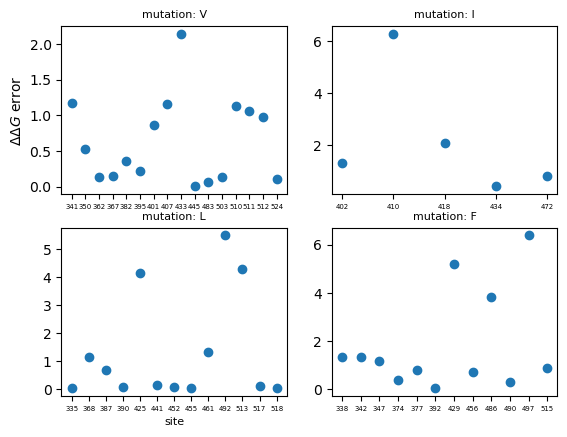

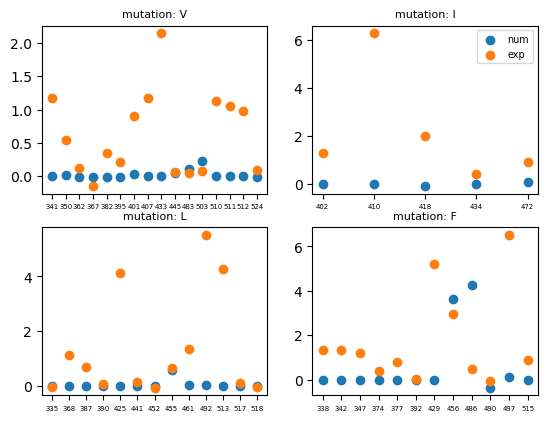

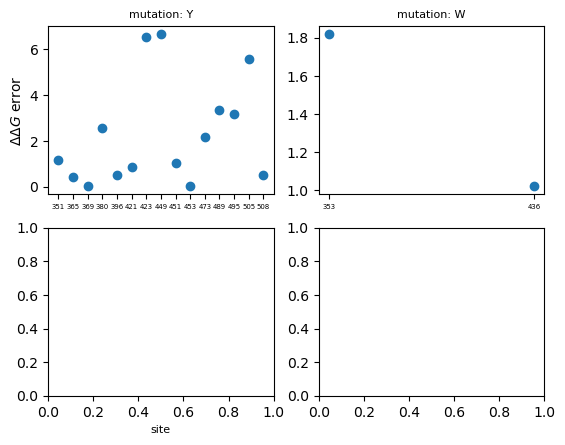

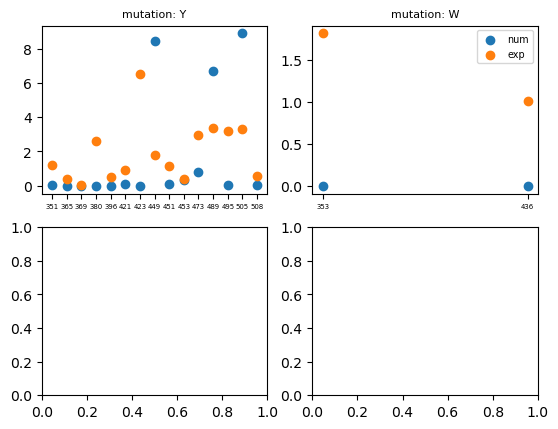

In [23]:
# fig, axs = plt.subplots(2,2)
c = 0
start = 0
stop = 4
error_stats = {}
for num_plots in range(len(list(sorted_dict.keys()))%4 ) :
   
    
    fig, axs = plt.subplots(2,2)
    fig2, axs2 = plt.subplots(2,2)
    c = 0
    
    for mut_name in list(sorted_dict.keys())[start:stop]:
        #plt.figure()
        #plt.subplot(2,2,i)
        j = c%2
        i= c//2
        
        mut_site_val =df_exp_data.iloc[idx]["bind_avg"].to_numpy()[sorted_dict[mut_name][0]]
        delta_delta_G_exp_cal_frist_method
        #convert values 
        mut_site_val_converted = delta_delta_G_exp_cal_frist_method(mut_site_val)
        
        site_error = np.abs(mut_site_val_converted - num_66[sorted_dict[mut_name][0]] )
        error_stats[mut_name] = np.mean(site_error), np.std(site_error)
        
        #num data
        axs2[i,j].scatter(sorted_dict[mut_name][1], num_66[sorted_dict[mut_name][0]], label="num")
        #exp data 
        axs2[i,j].scatter(sorted_dict[mut_name][1], mut_site_val_converted, label="exp")
        
        axs2[i,j].set_title(f"mutation: {mut_name}", fontsize=8)
        axs2[i,j].tick_params(axis="x", labelsize=5)
        
        
        axs[i,j].scatter(sorted_dict[mut_name][1], site_error)
        axs[i,j].set_title(f"mutation: {mut_name}", fontsize=8)
        axs[i,j].tick_params(axis="x", labelsize=5)
        #plt.xlabel("site")
        c= c+1 
    #axs.tick_params(axis="x", labelsize=5)
    plt.tight_layout
    axs[1,0].set_xlabel("site", fontsize= 8)
    axs[0,0].set_ylabel("$\Delta \Delta G}$ error")
    axs2[0,1].legend(fontsize="x-small")
    start = stop
    stop = min( (stop+4, len(list(sorted_dict.keys()))))

Text(0, 0.5, '$\\Delta \\Delta G}$ error')

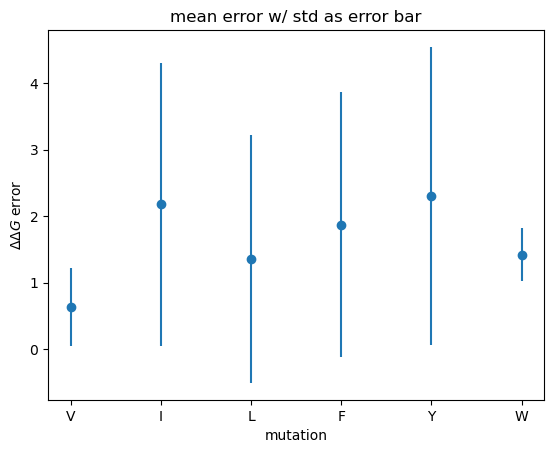

In [24]:
#error_stats
# plt.scatter(list(error_stats.keys()), \
#     [mean [0] for mean in list(error_stats.values())] ) 
plt.errorbar(list(error_stats.keys()), \
    [mean [0] for mean in list(error_stats.values())],
    yerr=[mean [1] for mean in list(error_stats.values())],
    fmt="o")
plt.title("mean error w/ std as error bar")
plt.xlabel("mutation")
plt.ylabel("$\Delta \Delta G}$ error")

## checking expr vs site:


In [25]:
expr_SARS2_val = df_exp_data.iloc[idx]["expr_avg"].to_numpy()

using expr avg

In [26]:
del_del_g_total_expr = delta_delta_G_exp_cal_frist_method(expr_SARS2_val)

Text(0.5, 0, 'site')

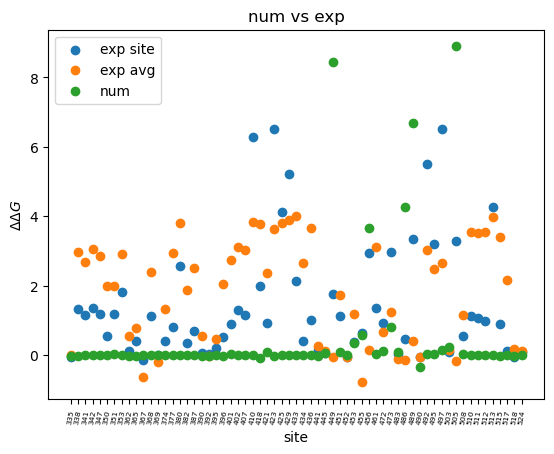

In [27]:

fig3, axs3 = plt.subplots(1,1)

axs3.set_title("num vs exp")
axs3.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp site")
axs3.scatter(mut_arg_sorted, del_del_g_total_expr[mut_arg_idx], label="exp avg")
axs3.scatter(mut_arg_sorted, num_66[mut_arg_idx], label="num")

axs3.tick_params(axis="x", labelsize=5.5, rotation=80)
axs3.legend()
axs3.set_ylabel("$\Delta \Delta G$")
axs3.set_xlabel("site")
# axs3[1].scatter(mut_arg_sorted, del_del_g_total_expr[mut_arg_idx], label="exp avg")
# axs3[1].scatter(mut_arg_sorted, num_66[mut_arg_idx], label="num")
# axs3[1].tick_params(axis="x", labelsize=5.5, rotation=80)
# axs3[1].set_xlabel("site")
# axs3[1].legend()

## all mutations using MPI

In [28]:
df_num_data_all = pd.read_csv("all_amino.csv")

In [29]:
num_66_all = - df_num_data_all["delta_delta_g_gen_66"].to_numpy()
num_all     = - df_num_data_all["delta_delta_g_gen"].to_numpy()

In [30]:
num_muts_all = df_num_data_all["mutations"]
exp_muts_np = df_exp_data["mutation"].to_numpy()
idx_all= []  
for mut in num_muts_all : 
    idx_all.append(np.where(exp_muts_np == mut )[0][0] ) 

In [31]:
mut_arg_all =np.array([mut[1:-1] for mut in df_num_data_all["mutations"].to_numpy()])
mut_arg_idx_all = mut_arg_all.argsort()
mut_arg_sorted_all = mut_arg_all[mut_arg_idx_all]

In [32]:
num_muts_all[mut_arg_idx_all].to_numpy()

array(['T333A', 'N334A', 'L335A', 'C336A', 'P337A', 'F338A', 'E340A',
       'V341A', 'F342A', 'N343A', 'T345A', 'R346A', 'F347A', 'S349A',
       'V350A', 'Y351A', 'W353A', 'N354A', 'R355A', 'K356A', 'S359A',
       'N360A', 'V362A', 'D364A', 'Y365A', 'S366A', 'V367A', 'L368A',
       'Y369A', 'N370A', 'S371A', 'S373A', 'F374A', 'S375A', 'T376A',
       'F377A', 'K378A', 'C379A', 'Y380A', 'V382A', 'S383A', 'P384A',
       'T385A', 'K386A', 'L387A', 'N388A', 'D389A', 'L390A', 'C391A',
       'F392A', 'T393A', 'V395A', 'Y396A', 'D398A', 'S399A', 'V401A',
       'I402A', 'R403A', 'D405A', 'V407A', 'R408A', 'Q409A', 'I410A',
       'P412A', 'Q414A', 'T415A', 'K417A', 'I418A', 'D420A', 'Y421A',
       'N422A', 'Y423A', 'K424A', 'L425A', 'D428A', 'F429A', 'T430A',
       'C432A', 'V433A', 'I434A', 'W436A', 'S438A', 'N439A', 'N440A',
       'L441A', 'D442A', 'S443A', 'K444A', 'V445A', 'N448A', 'Y449A',
       'N450A', 'Y451A', 'L452A', 'Y453A', 'R454A', 'L455A', 'F456A',
       'R457A', 'S45

In [33]:
df_exp_data.iloc[idx_all]["mutation"].to_numpy()[mut_arg_idx_all]

array(['T333A', 'N334A', 'L335A', 'C336A', 'P337A', 'F338A', 'E340A',
       'V341A', 'F342A', 'N343A', 'T345A', 'R346A', 'F347A', 'S349A',
       'V350A', 'Y351A', 'W353A', 'N354A', 'R355A', 'K356A', 'S359A',
       'N360A', 'V362A', 'D364A', 'Y365A', 'S366A', 'V367A', 'L368A',
       'Y369A', 'N370A', 'S371A', 'S373A', 'F374A', 'S375A', 'T376A',
       'F377A', 'K378A', 'C379A', 'Y380A', 'V382A', 'S383A', 'P384A',
       'T385A', 'K386A', 'L387A', 'N388A', 'D389A', 'L390A', 'C391A',
       'F392A', 'T393A', 'V395A', 'Y396A', 'D398A', 'S399A', 'V401A',
       'I402A', 'R403A', 'D405A', 'V407A', 'R408A', 'Q409A', 'I410A',
       'P412A', 'Q414A', 'T415A', 'K417A', 'I418A', 'D420A', 'Y421A',
       'N422A', 'Y423A', 'K424A', 'L425A', 'D428A', 'F429A', 'T430A',
       'C432A', 'V433A', 'I434A', 'W436A', 'S438A', 'N439A', 'N440A',
       'L441A', 'D442A', 'S443A', 'K444A', 'V445A', 'N448A', 'Y449A',
       'N450A', 'Y451A', 'L452A', 'Y453A', 'R454A', 'L455A', 'F456A',
       'R457A', 'S45

In [34]:
# num_muts_all[mut_arg_idx_all].to_numpy() , \
#     df_exp_data.iloc[idx_all]["mutation"].to_numpy()[mut_arg_idx_all] 

In [35]:
mut_arg_idx_all

array([  3,  81, 136, 132,  10,  62,  27, 145,  63,  34,  54,  69,  47,
       116, 108,  76,  75, 122, 135,  20,  94, 129,   2,  16,  21,  84,
        82,  36,  33, 148, 144,  26, 154, 151, 153,  73, 109, 126,  31,
        64,  59,  66,  37,  42, 152, 117,   0,  77, 110,  74, 125, 137,
       131,  57,  88, 139, 141,  22,   6,   7,  96,  71,  52,  97,  29,
        32,  55,  14,  50,  46,  44, 149,  92,  61,  13, 120,  15,  83,
        86,  78,  80,  99, 104,  48,  98,  43, 150,  60,  58,  12, 130,
        19, 138,  11,  17,   1, 111, 127, 113,  53,  87, 134, 140,  25,
       107, 106,   4,  70, 105, 100,  40,  72, 147,  91, 118, 133,  68,
        67, 102,  93, 146,  90,  85, 142,   8, 119,  23,   9,  79, 123,
       112, 101, 103, 114,   5, 124, 121,  18,  24, 143,  35,  56,  28,
        89,  30,  38,  51,  41,  45, 115, 128,  95,  65,  39,  49],
      dtype=int64)

check idx

In [36]:
np.all( num_muts_all[mut_arg_idx_all] == df_exp_data.iloc[idx_all]["mutation"].to_numpy()[mut_arg_idx_all] )

True

In [37]:
site_SARS2_val_all = df_exp_data.iloc[idx_all]["bind_avg"].to_numpy()

In [38]:
del_del_G_all_muts = delta_delta_G_exp_cal_frist_method(site_SARS2_val_all)

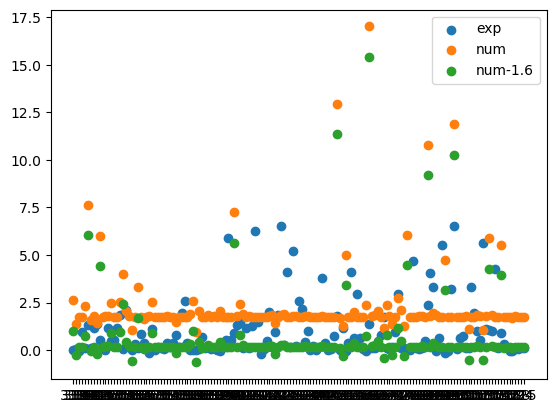

In [39]:
plt.scatter(mut_arg_sorted_all, del_del_G_all_muts[mut_arg_idx_all], label="exp")
#plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
plt.scatter(mut_arg_idx_all, num_66_all[mut_arg_idx_all], label="num")
plt.scatter(mut_arg_idx_all, num_66_all[mut_arg_idx_all]-1.6, label="num-1.6")
plt.legend()

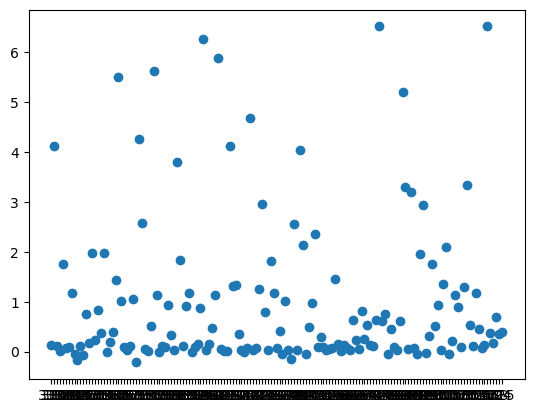

In [40]:
plt.scatter(mut_arg_sorted_all, del_del_G_all_muts)

In [41]:
num_66_all[mut_arg_idx], del_del_G_all_muts[mut_arg_idx]

(array([6.0153, 1.7548, 1.3589, 1.7532, 1.7658, 1.7881, 2.5021, 1.7681,
        1.7654, 1.8862, 1.7342, 2.0428, 1.7622, 2.3246, 0.9458, 1.8689,
        1.7549, 1.7548, 1.7519, 1.7629, 1.7887, 1.7604, 1.7543, 2.4936,
        7.246 , 2.0485, 1.7507, 1.7599, 7.6392, 1.4641, 3.3051, 1.7502,
        1.7584, 1.757 , 1.7678, 1.9194, 2.5408, 1.7899, 1.7617, 2.4018,
        1.036 , 1.562 , 3.997 , 1.7506, 2.6026, 1.7568, 1.7504, 1.7586,
        1.779 , 1.7548, 1.7724, 1.7431, 1.4056, 1.7602, 2.6108, 1.754 ,
        1.7508, 1.6582, 1.7271, 1.7591, 1.7611, 2.0303, 1.7624]),
 array([-0.17662025,  1.12765237,  4.13019662,  0.        , -0.01358617,
         0.        ,  0.12227556,  0.05434469,  1.12765237,  0.05434469,
         0.51627458,  3.80412846,  1.18199706,  1.75261633,  0.04075852,
         0.92385977,  0.12227556,  0.01358617, -0.21737877,  2.58137289,
         0.76082569,  0.23096494,  0.12227556,  0.17662025,  0.47551606,
         0.1494479 ,  1.31785879,  0.04075852,  0.08151704,  5.63

## All mutations w/o MPI

function for processing: 

In [42]:
def exp_v_num_plotter( csv_name, df_exp_data) : 
    #get csv
    df_num_data_all_single_core = pd.read_csv(csv_name)
    #get mut names
    num_muts_all_sc = df_num_data_all_single_core["mutations"]
    #get mut names from exp DF
    exp_muts_np = df_exp_data["mutation"].to_numpy()
    #find matching index
    idx_all= []  
    for mut in num_muts_all_sc : 
        idx_all.append(np.where(exp_muts_np == mut )[0][0] ) 

    #get binding_avg value of the matching idx 
    site_SARS2_val_all = df_exp_data.iloc[idx_all]["bind_avg"].to_numpy()
    #calc Del_Del_G
    del_del_G_all_muts = delta_delta_G_exp_cal_frist_method(site_SARS2_val_all)
    
    #get sorting idx del del G from numerical data
    num_66_all_sc = - df_num_data_all_single_core["delta_delta_g_gen_66"].to_numpy()
    mut_arg_all =np.array([mut[1:-1] for mut in df_num_data_all["mutations"].to_numpy()])
    mut_arg_idx_all = mut_arg_all.argsort()
    mut_arg_sorted_all = mut_arg_all[mut_arg_idx_all]
    
    
    
    plt.figure(1)
    plt.scatter(mut_arg_sorted_all[0:75], del_del_G_all_muts[mut_arg_idx_all][0:75], label="exp")
    #plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
    plt.scatter(mut_arg_sorted_all[0:75], num_66_all_sc[mut_arg_idx_all][0:75], label="num")
    plt.legend()
    plt.tick_params(axis="x", labelsize=5.5, rotation=80)
    plt.legend()
    plt.ylabel("$\Delta \Delta G$")
    plt.xlabel("site")
    
    plt.figure(2)
    plt.scatter(mut_arg_sorted_all[75:], del_del_G_all_muts[mut_arg_idx_all][75:], label="exp")
    #plt.scatter(mut_arg_sorted, del_del_g_total[mut_arg_idx], label="exp")
    plt.scatter(mut_arg_sorted_all[75:], num_66_all_sc[mut_arg_idx_all][75:], label="num")
    plt.legend()
    plt.tick_params(axis="x", labelsize=5.5, rotation=80)
    plt.legend()
    plt.ylabel("$\Delta \Delta G$")
    plt.xlabel("site")
    return 

    

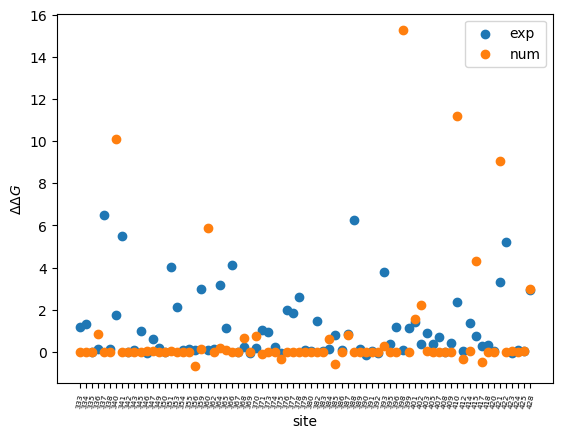

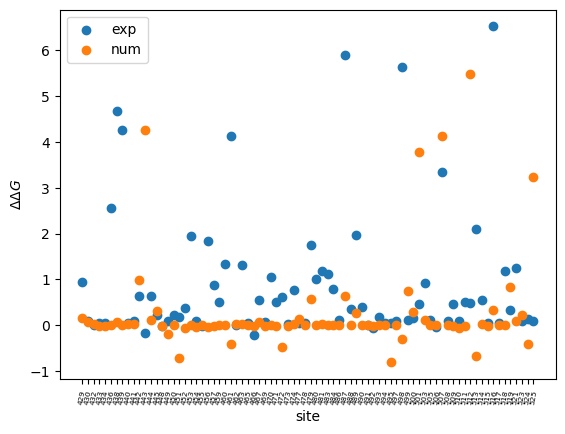

In [43]:
exp_v_num_plotter("all_amino_single_core.csv", df_exp_data)

## binding site:


In [44]:
binding_idx = np.array([417, 439, 446, 449, 453, 455, 456, 475, 486, \
                487, 489, 493, 494, 496, 498, 500, 501, 502, 503, 505])

In [45]:
df_num_data_all_single_core = pd.read_csv("all_amino_single_core.csv")
#get mut names
num_muts_all_sc = df_num_data_all_single_core["mutations"]
#get mut names from exp DF
exp_muts_np = df_exp_data["mutation"].to_numpy()
#make negative
num_66_all_sc = - df_num_data_all_single_core["delta_delta_g_gen_66"].to_numpy()


idx_all= []  
for mut in num_muts_all_sc : 
    idx_all.append(np.where(exp_muts_np == mut )[0][0] ) 

mut_arg_all =np.array([mut[1:-1] for mut in df_num_data_all_single_core["mutations"].to_numpy()])
mut_arg_idx_all = mut_arg_all.argsort()
mut_arg_sorted_all = mut_arg_all[mut_arg_idx_all]

mut_arg_idx_all_site =[]
for arr_idx ,mut_idx in enumerate (mut_arg_sorted_all ):
    if int(mut_idx) in binding_idx:
        mut_arg_idx_all_site.append(arr_idx)
        



#num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site]




check idx

In [46]:
np.all(df_num_data_all_single_core.iloc[mut_arg_idx_all]["mutations"].to_numpy()[mut_arg_idx_all_site] ==
df_exp_data.iloc[idx_all]["mutation"].to_numpy()[mut_arg_idx_all][mut_arg_idx_all_site] )

True

In [47]:
df_num_data_all_single_core_optrad = pd.read_csv("all_amino_with_optradii.csv")
num_66_all_sc_or = - df_num_data_all_single_core_optrad["delta_delta_g_gen_66"].to_numpy()
num_muts_all_sc_or = df_num_data_all_single_core_optrad["mutations"].to_numpy()

mut_arg_all_or =np.array([mut[1:-1] for mut in df_num_data_all_single_core_optrad["mutations"].to_numpy()])
mut_arg_idx_all_or = mut_arg_all_or.argsort()
mut_arg_sorted_all_or = mut_arg_all_or[mut_arg_idx_all_or]




In [48]:
mut_arg_idx_all_site_or =[]
for arr_idx ,mut_idx in enumerate (mut_arg_sorted_all_or ):
    if int(mut_idx) in binding_idx:
        mut_arg_idx_all_site_or.append(arr_idx)

check or idx internal stuff

In [49]:
np.all(num_muts_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or] ==
df_num_data_all_single_core_optrad["mutations"].to_numpy()[mut_arg_idx_all_or][mut_arg_idx_all_site_or] )

True

In [50]:
site_SARS2_val_all = df_exp_data.iloc[idx_all]["bind_avg"].to_numpy()
del_del_G_all_muts = delta_delta_G_exp_cal_frist_method(site_SARS2_val_all)

Code to get the binding site mutations for runs

In [51]:
muts_in_input_format = [] 
for mut in num_muts_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or] :
    tmp_mut = mut[0] + ":" + mut[1:-1] + ":" + mut[-1]
    muts_in_input_format.append( tmp_mut )
    print(tmp_mut, end=' ')


K:417:A N:439:A Y:449:A Y:453:A L:455:A F:456:A F:486:A N:487:A Y:489:A Q:493:A S:494:A Q:498:A T:500:A N:501:A V:503:A Y:505:A 

In [52]:
#(- df_num_data_all_single_core_optrad["delta_delta_g_gen"].to_numpy())[mut_arg_idx_all_or][mut_arg_idx_all_site_or]

Text(0.5, 0, 'site')

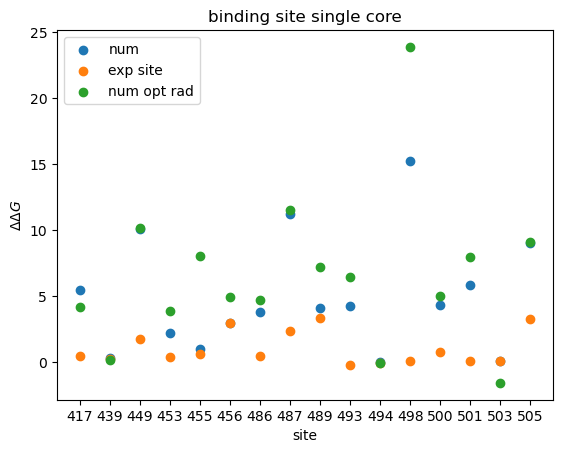

In [53]:
plt.scatter( mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site]
            , num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site], label="num")

plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
             del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site], label="exp site")
# plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
#             num_66_all[mut_arg_idx_all][mut_arg_idx_all_site], label="num_MPI")
plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
             num_66_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or], label="num opt rad")
plt.legend()
plt.title("binding site single core")
plt.ylabel("$\Delta \Delta G$")
plt.xlabel("site")

RMSE for binding site

In [54]:
np.sqrt( np.mean( (num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site] - del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site])**2))

5.690082358669173

In [55]:
np.sqrt( np.mean( (num_66_all_sc[mut_arg_idx_all] - del_del_G_all_muts[mut_arg_idx_all] )**2 ))

2.5105953279024127

In [56]:
# plt.scatter( mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site]
#             , num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site], label="num")

# plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
#              del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site], label="exp site")



#np.mean(np.abs((num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site] -del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site])))


In [57]:
#np.mean(np.abs((num_66_all_sc[mut_arg_idx_all] -del_del_G_all_muts[mut_arg_idx_all])))

In [58]:
num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site]


array([ 5.4871,  0.3185, 10.1209,  2.238 ,  0.9795,  2.9929,  3.7838,
       11.2031,  4.1285,  4.2564,  0.0346, 15.2607,  4.3174,  5.8803,
        0.0793,  9.0419])

PB info:


In [70]:
df_pb_data = pd.read_csv("all_amino_salt_pb.csv", index_col=0)
df_pb_data

,mutations,delta_delta_g_gen,delta_delta_g_gen_error,delta_delta_g_gen_66,delta_delta_g_gen_66_error,delta_delta_g_pb,delta_delta_g_pb_error
0,F456A_1,-4.5545,0.9248,-2.9415,1.4931,-3.0770,1.5827
1,F486A_1,-5.4050,1.1989,-4.7041,1.9673,-3.3428,1.5837
2,L455A_1,-3.2570,0.8119,-1.7295,2.4009,-1.7006,2.4286
3,Q498A_1,-12.6866,2.3141,-13.9882,4.5132,-16.9744,4.2800
4,N501A_1,-4.8604,2.3527,-8.3605,5.6201,-9.4628,3.3976
5,T500A_1,-2.7977,1.6169,-5.6780,2.1545,-4.3073,1.7929
6,Y453A_1,-1.7793,1.2250,-1.4606,3.1307,-0.7641,1.6057
7,K417A_1,-3.4770,2.7377,-3.4960,27.4894,-5.5744,2.5163
8,Y489A_1,-5.5297,1.6704,-2.6731,2.9329,-1.2919,2.8653
9,N487A_1,-5.2161,1.5071,-7.8861,4.3046,-9.4031,2.9686


In [86]:
all_muts_in_df = df_pb_data["mutations"].to_numpy()
tmp_muts = []
for muts in all_muts_in_df : 
    tmp_muts.append( int(muts[1:4]) )
tmp_muts = np.array(tmp_muts)
tmp_idx = tmp_muts.argsort()


array([ 7, 11, 15,  6,  2,  0,  1,  9,  8, 13, 12,  3,  5,  4, 10, 14],
      dtype=int64)

In [94]:
all_muts_in_df_sorted = df_pb_data.iloc[tmp_idx]
all_muts_in_df_sorted

,mutations,delta_delta_g_gen,delta_delta_g_gen_error,delta_delta_g_gen_66,delta_delta_g_gen_66_error,delta_delta_g_pb,delta_delta_g_pb_error
7,K417A_1,-3.4770,2.7377,-3.4960,27.4894,-5.5744,2.5163
11,N439A_1,0.1195,0.0769,-0.2096,1.8359,-0.3965,0.4383
15,Y449A_1,-6.8638,2.2919,-7.5120,5.8725,-2.2974,2.7748
6,Y453A_1,-1.7793,1.2250,-1.4606,3.1307,-0.7641,1.6057
2,L455A_1,-3.2570,0.8119,-1.7295,2.4009,-1.7006,2.4286
0,F456A_1,-4.5545,0.9248,-2.9415,1.4931,-3.0770,1.5827
1,F486A_1,-5.4050,1.1989,-4.7041,1.9673,-3.3428,1.5837
9,N487A_1,-5.2161,1.5071,-7.8861,4.3046,-9.4031,2.9686
8,Y489A_1,-5.5297,1.6704,-2.6731,2.9329,-1.2919,2.8653
13,Q493A_1,-5.8346,2.3675,-5.9813,8.1978,-6.8255,6.0274


In [98]:
pb_binding_site_results =  -all_muts_in_df_sorted["delta_delta_g_pb"].to_numpy()
pb_binding_site_results


array([ 5.5744,  0.3965,  2.2974,  0.7641,  1.7006,  3.077 ,  3.3428,
        9.4031,  1.2919,  6.8255, -0.0992, 16.9744,  4.3073,  9.4628,
       -0.6992,  5.6042])

Text(0.5, 0, 'site')

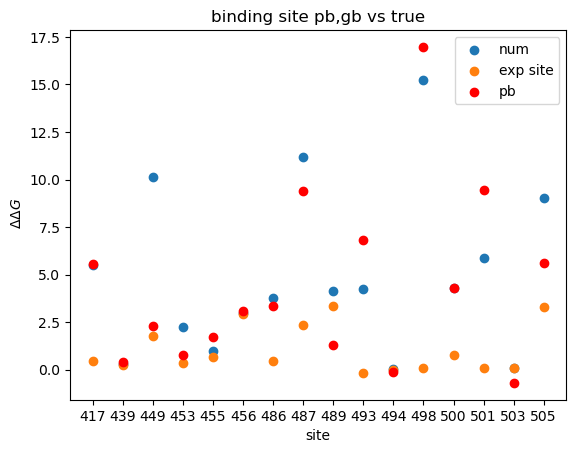

In [116]:

plt.scatter( mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site]
            , num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site], label="num")

plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
             del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site], label="exp site")
# plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
# #             num_66_all[mut_arg_idx_all][mut_arg_idx_all_site], label="num_MPI")
# plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], 
#              num_66_all_sc_or[mut_arg_idx_all_or][mut_arg_idx_all_site_or], label="num opt rad")

plt.scatter(mut_arg_all[mut_arg_idx_all][mut_arg_idx_all_site], pb_binding_site_results,
            label="pb", c='r' ) 
            
plt.legend()
plt.title("binding site pb,gb vs true")
plt.ylabel(" $\Delta \Delta G$")
plt.xlabel("site")

pb vs gb 

In [103]:
true_values = del_del_G_all_muts[mut_arg_idx_all][mut_arg_idx_all_site]
gb_values = num_66_all_sc[mut_arg_idx_all][mut_arg_idx_all_site]
pb_values = pb_binding_site_results

looking at errors: 

In [107]:
def rmse ( arr1, arr2) :
    rmse_error = np.sqrt( np.mean((arr1 - arr2)**2))
    return rmse_error

In [117]:
exp_vs_gb =rmse(true_values,gb_values )
print("true data and GB RMSE: ", exp_vs_gb)
exp_vs_pb = rmse(true_values,pb_values )
print("true data and PB RMSE: ", exp_vs_pb)
gb_vs_pb = rmse(gb_values,pb_values )
print("GB and PB RMSE:       ", gb_vs_pb)


true data and GB RMSE:  5.690082358669173
true data and PB RMSE:  5.760982330726606
GB and PB RMSE:        2.624574656849182
